In [120]:
%matplotlib inline
import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
from helpers import *
from plots import *
from mf_sgd import *
from baseline_predictions import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TODO:

kaggle:
- submit bias, restricted for gamma = 0.005, 60 features, lambda = 0.06, (no step decrease), 30 iterations

# 1) Load Data

number of items: 10000, number of users: 1000


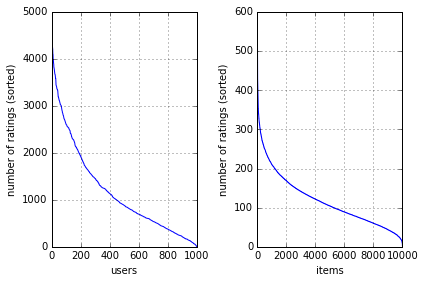

In [121]:
path_dataset = "/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project2/data/data_train.csv"
ratings = load_data(path_dataset)

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

# 3) Cross validation

In [ ]:
mu, user_biases, item_biases = compute_biases(ratings)

## 3.1) num_features 

In [14]:
from biased_mf_sgd import run_mf_biased_cv_num_features
k_fold = 4
num_features = np.arange(10, 200, 10)
num_epochs = 20
lambda_ = 0
rmse_tr, rmse_te = run_mf_biased_cv_num_features(ratings, k_fold, num_epochs, num_features, lambda_, 
                                                 mu, user_biases, item_biases)

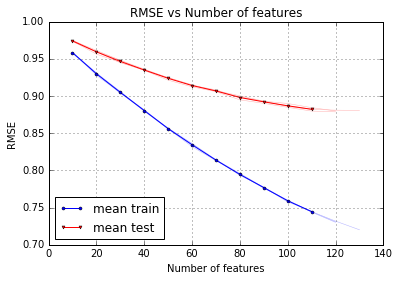

In [7]:
from plots import visualization_num_features
np.save('cv_train_num_features', rmse_tr)
np.save('cv_test_num_features', rmse_te)

visualization_num_features(rmse_tr, rmse_te, num_features, "cv_num_features")

## 3.2) lambda

In [18]:
from biased_mf_sgd import run_mf_biased_cv_lambda
k_fold = 4
num_features = 30
num_epochs = 20
lambdas = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5])
rmse_tr, rmse_te = run_mf_biased_cv_lambda(ratings, k_fold, num_epochs, num_features, lambdas, 
                                           mu, user_biases, item_biases)

Learn the matrix factorization using SGD...
iter: 0, RMSE on training set: [ 1.17308578].
RMSE on test data: [ 1.18061731].
iter: 1, RMSE on training set: [ 1.04262197].
RMSE on test data: [ 1.05504142].
iter: 2, RMSE on training set: [ 1.01330096].
RMSE on test data: [ 1.02945183].
iter: 3, RMSE on training set: [ 0.99399529].
RMSE on test data: [ 1.01368411].
iter: 4, RMSE on training set: [ 0.97883916].
RMSE on test data: [ 1.00184963].
iter: 5, RMSE on training set: [ 0.96632991].
RMSE on test data: [ 0.99237567].
iter: 6, RMSE on training set: [ 0.95584182].
RMSE on test data: [ 0.98459549].
iter: 7, RMSE on training set: [ 0.94700257].
RMSE on test data: [ 0.97812778].
iter: 8, RMSE on training set: [ 0.93954053].
RMSE on test data: [ 0.97271449].
iter: 9, RMSE on training set: [ 0.93323916].
RMSE on test data: [ 0.96816576].
iter: 10, RMSE on training set: [ 0.92791886].
RMSE on test data: [ 0.96433465].
iter: 11, RMSE on training set: [ 0.92342736].
RMSE on test data: [ 0.96110

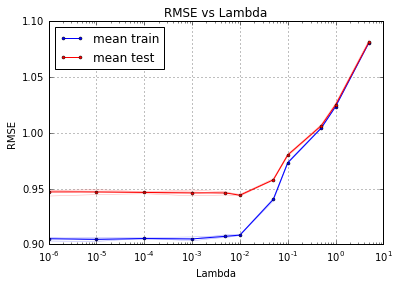

In [21]:
from plots import visualization_lambdas
np.save('cv_train_lambdas', rmse_tr)
np.save('cv_test_lambdas', rmse_te)

visualization_lambdas(rmse_tr, rmse_te, lambdas, "cv_lambdas")

In [134]:
k_fold = 4
num_features = 60
num_epochs = 20
lambdas = np.linspace(0.01, 0.1, 10)
rmse_tr, rmse_te = run_mf_biased_cv_lambda(ratings, k_fold, num_epochs, num_features, lambdas,
                                          mu, user_biases, item_biases)

Learn the matrix factorization using SGD...
iter: 0, RMSE on training set: [ 1.24474017].
RMSE on test data: [ 1.25192856].
iter: 1, RMSE on training set: [ 1.04576877].
RMSE on test data: [ 1.06050429].
iter: 2, RMSE on training set: [ 1.00600396].
RMSE on test data: [ 1.02410986].
iter: 3, RMSE on training set: [ 0.98601264].
RMSE on test data: [ 1.00657926].
iter: 4, RMSE on training set: [ 0.97274223].
RMSE on test data: [ 0.99531827].
iter: 5, RMSE on training set: [ 0.96284532].
RMSE on test data: [ 0.987122].
iter: 6, RMSE on training set: [ 0.95505479].
RMSE on test data: [ 0.98078605].
iter: 7, RMSE on training set: [ 0.94875401].
RMSE on test data: [ 0.97573125].
iter: 8, RMSE on training set: [ 0.94358503].
RMSE on test data: [ 0.97162787].
iter: 9, RMSE on training set: [ 0.93931152].
RMSE on test data: [ 0.96826361].
iter: 10, RMSE on training set: [ 0.93576217].
RMSE on test data: [ 0.96548836].
iter: 11, RMSE on training set: [ 0.93280503].
RMSE on test data: [ 0.9631888

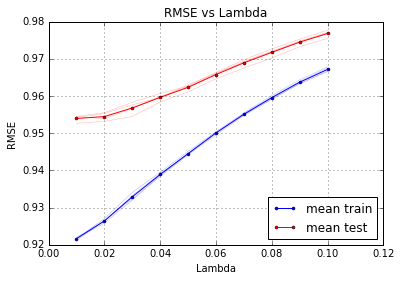

In [135]:
np.save('cv_train_lambdas_K60', rmse_tr)
np.save('cv_test_lambdas_K60', rmse_te)

visualization_lambdas(rmse_tr, rmse_te, lambdas, "cv_lambdas_K60")

## 3.3) 2D cv

In [55]:
lambdas = np.array([0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175])
num_features = np.array([15, 20 , 25, 30, 35, 40])
k_fold = 4
num_epochs = 20

In [69]:
from biased_mf_sgd import run_mf_biased_cv_num_features_lambdas

rmse_tr, rmse_te = run_mf_biased_cv_num_features_lambdas(ratings, k_fold, num_epochs, num_features, lambdas,
                                                         mu, user_biases, item_biases)

Learn the matrix factorization using SGD...
iter: 0, RMSE on training set: [ 1.07802747].
RMSE on test data: [ 1.08354516].
iter: 1, RMSE on training set: [ 1.0182775].
RMSE on test data: [ 1.02565565].
iter: 2, RMSE on training set: [ 1.00259778].
RMSE on test data: [ 1.01157729].
iter: 3, RMSE on training set: [ 0.9920814].
RMSE on test data: [ 1.00256843].
iter: 4, RMSE on training set: [ 0.98377513].
RMSE on test data: [ 0.99566761].
iter: 5, RMSE on training set: [ 0.9768798].
RMSE on test data: [ 0.99005525].
iter: 6, RMSE on training set: [ 0.97106422].
RMSE on test data: [ 0.98539021].
iter: 7, RMSE on training set: [ 0.96613901].
RMSE on test data: [ 0.98147984].
iter: 8, RMSE on training set: [ 0.96196869].
RMSE on test data: [ 0.9781959].
iter: 9, RMSE on training set: [ 0.95844304].
RMSE on test data: [ 0.9754382].
iter: 10, RMSE on training set: [ 0.9554693].
RMSE on test data: [ 0.97312513].
iter: 11, RMSE on training set: [ 0.95296834].
RMSE on test data: [ 0.9711915].
i

In [70]:
np.save("2d_cv_train", rmse_tr)
np.save("2d_cv_test", rmse_te)

## 3.4) for fixed parameters (comparison with other models)

number of items: 10000, number of users: 1000


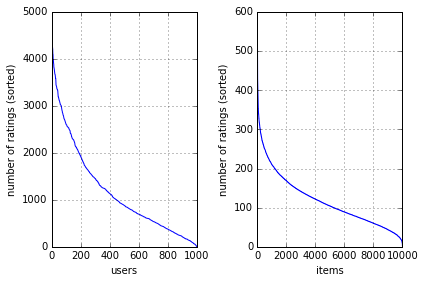

In [142]:
path_dataset = "/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project2/data/data_train.csv"
ratings = load_data(path_dataset)

num_items_per_user, num_users_per_item = plot_raw_data(ratings)


case 1: bias computed for all users & items

In [ ]:
from biased_mf_sgd import run_mf_bias_cv, compute_biases
k_fold = 4
num_epochs = 30
num_features = 20
lambda_ = 0.01
mu, user_biases, item_biases = compute_biases(ratings)

rmse_tr, rmse_te= run_mf_bias_cv(ratings, k_fold, num_epochs, num_features, lambda_, mu, user_biases, item_biases)

Learn the matrix factorization using SGD...


In [37]:
np.save("cv_rmse_test_biased", rmse_te)
np.save("cv_rmse_train_biased", rmse_tr)
test_error = np.mean(rmse_te, axis = 0)
std_dev = np.std(rmse_te, axis =0)
print(std_dev)
print(test_error)

[ 0.00120331]
[ 0.94407397]


case 2: bias computed for restricted subset of users & items

In [ ]:
from biased_mf_sgd import run_mf_bias_cv, compute_biases_restricted
k_fold = 4
num_epochs = 30
num_features = 20
lambda_ = 0.01
min_num_ratings = 10
mu, user_biases, item_biases = compute_biases_restricted(ratings, num_items_per_user, num_users_per_item,
                                                         min_num_ratings)

rmse_tr, rmse_te= run_mf_bias_cv(ratings, k_fold, num_epochs, num_features, lambda_, mu, user_biases, item_biases)

In [ ]:
np.save("cv_rmse_test_biased_restricted", rmse_te)
np.save("cv_rmse_train_biased_restricted", rmse_tr)
test_error = np.mean(rmse_te, axis = 0)
std_dev = np.std(rmse_te, axis =0)
print(std_dev)
print(test_error)

# 3) make submission

In [138]:
from biased_mf_sgd import mf_sgd_biased_compute_predictions
from biased_mf_sgd import compute_biases_restricted
num_epochs = 30
gamma = 0.005
num_features = 60
lambda_ = 0.06
min_num_ratings = 10
mu, user_biases, item_biases = compute_biases_restricted(ratings, num_items_per_user, num_users_per_item,
                                                         min_num_ratings)
X_hat, rmse = mf_sgd_biased_compute_predictions(ratings, num_epochs, gamma, num_features, lambda_,
                                                mu, user_biases, item_biases)

learn the matrix factorization using SGD...
Starting epoch number 0
Starting epoch number 5
Starting epoch number 10
Starting epoch number 15
Starting epoch number 20
Starting epoch number 25


In [139]:
from collections import deque
import datetime
now = datetime.datetime.now()
now_str = now.strftime("%d-%m-%Y_%Hh%M_%S")
output_path = '/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project2/data/predictions-%s-group-clm.csv' % now_str

indices = extract_indices('/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project2/data/sampleSubmission.csv')

ratings_to_write = deque()

# make sure that the predictions stay within the valid range of 1-5
X_hat[X_hat < 1] = 1
X_hat[X_hat > 5] = 5
for row, col in indices:
    ratings_to_write.append((row, col, X_hat[row,col]))
    
create_csv_submission(ratings_to_write, output_path)

999   0
